In [15]:
import numpy as np
import tensorflow as tf
import mediapipe as mp
import os
import csv
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.utils import to_categorical
from tensorflow.keras.models import load_model
# from flask import Flask, render_template, request, jsonify
# from keras.models import model_from_json
# from flask import Flask, jsonify
# from flask_cors import CORS

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

# Checking Tensorflow Version
tf.__version__

'2.15.0'

In [16]:
def extract_feature(input_image):
    mp_hands = mp.solutions.hands
    mp_drawing = mp.solutions.drawing_utils 
    image = cv.imread(input_image)
    image = cv.resize(image,(2000,2000))
    # image = cv.flip(image, 1)
    with mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.1) as hands:
        while True:
            results = hands.process(cv.flip(cv.cvtColor(image, cv.COLOR_BGR2RGB), 1))
            image_height, image_width, _ = image.shape
            # Print handedness (left v.s. right hand).
            # Caution : Uncomment these print command will resulting long log of mediapipe log
            #print(f'Handedness of {input_image}:')
            #print(results.multi_handedness)

            # Draw hand landmarks of each hand.
            # Caution : Uncomment these print command will resulting long log of mediapipe log
            #print(f'Hand landmarks of {input_image}:')
            if not results.multi_hand_landmarks:
                # Here we will set whole landmarks into zero as no handpose detected
                # in a picture wanted to extract.
                
                # Wrist Hand
                wristX = 0
                wristY = 0
                wristZ = 0
                
                # Thumb Finger
                thumb_CmcX = 0
                thumb_CmcY = 0
                thumb_CmcZ = 0
                
                thumb_McpX = 0
                thumb_McpY = 0
                thumb_McpZ = 0
                
                thumb_IpX = 0
                thumb_IpY = 0
                thumb_IpZ = 0
                
                thumb_TipX = 0
                thumb_TipY = 0
                thumb_TipZ = 0

                # Index Finger
                index_McpX = 0
                index_McpY = 0
                index_McpZ = 0
                
                index_PipX = 0
                index_PipY = 0
                index_PipZ = 0
                
                index_DipX = 0
                index_DipY = 0
                index_DipZ = 0
                
                index_TipX = 0
                index_TipY = 0
                index_TipZ = 0

                # Middle Finger
                middle_McpX = 0
                middle_McpY = 0
                middle_McpZ = 0
                
                middle_PipX = 0
                middle_PipY = 0
                middle_PipZ = 0
                
                middle_DipX = 0
                middle_DipY = 0
                middle_DipZ = 0
                
                middle_TipX = 0
                middle_TipY = 0
                middle_TipZ = 0

                # Ring Finger
                ring_McpX = 0
                ring_McpY = 0
                ring_McpZ = 0
                
                ring_PipX = 0
                ring_PipY = 0
                ring_PipZ = 0
                
                ring_DipX = 0
                ring_DipY = 0
                ring_DipZ = 0
                
                ring_TipX = 0
                ring_TipY = 0
                ring_TipZ = 0

                # Pinky Finger
                pinky_McpX = 0
                pinky_McpY = 0
                pinky_McpZ = 0
                
                pinky_PipX = 0
                pinky_PipY = 0
                pinky_PipZ = 0
                
                pinky_DipX = 0
                pinky_DipY = 0
                pinky_DipZ = 0
                
                pinky_TipX = 0
                pinky_TipY = 0
                pinky_TipZ = 0
                
                # Set image to Zero
                annotated_image = 0

                # Return Whole Landmark and Image
                return (wristX, wristY, wristZ,
                        thumb_CmcX, thumb_CmcY, thumb_CmcZ,
                        thumb_McpX, thumb_McpY, thumb_McpZ,
                        thumb_IpX, thumb_IpY, thumb_IpZ,
                        thumb_TipX, thumb_TipY, thumb_TipZ,
                        index_McpX, index_McpY, index_McpZ,
                        index_PipX, index_PipY, index_PipZ,
                        index_DipX, index_DipY, index_DipZ,
                        index_TipX, index_TipY, index_TipZ,
                        middle_McpX, middle_McpY, middle_McpZ,
                        middle_PipX, middle_PipY, middle_PipZ,
                        middle_DipX, middle_DipY, middle_DipZ,
                        middle_TipX, middle_TipY, middle_TipZ,
                        ring_McpX, ring_McpY, ring_McpZ,
                        ring_PipX, ring_PipY, ring_PipZ,
                        ring_DipX, ring_DipY, ring_DipZ,
                        ring_TipX, ring_TipY, ring_TipZ,
                        pinky_McpX, pinky_McpY, pinky_McpZ,
                        pinky_PipX, pinky_PipY, pinky_PipZ,
                        pinky_DipX, pinky_DipY, pinky_DipZ,
                        pinky_TipX, pinky_TipY, pinky_TipZ,
                        annotated_image)
            
            annotated_image = cv.flip(image.copy(), 1)
            for hand_landmarks in results.multi_hand_landmarks:
                # Wrist Hand /  Pergelangan Tangan
                wristX = hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].x * image_width
                wristY = hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].y * image_height
                wristZ = hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].z

                # Thumb Finger / Ibu Jari
                thumb_CmcX = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].x * image_width
                thumb_CmcY = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].y * image_height
                thumb_CmcZ = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].z
                
                thumb_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP].x * image_width
                thumb_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP].y * image_height
                thumb_McpZ = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP].z
                
                thumb_IpX = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_IP].x * image_width
                thumb_IpY = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_IP].y * image_height
                thumb_IpZ = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_IP].z
                
                thumb_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].x * image_width
                thumb_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].y * image_height
                thumb_TipZ = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].z

                # Index Finger / Jari Telunjuk
                index_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].x * image_width
                index_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].y * image_height
                index_McpZ = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].z
                
                index_PipX = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].x * image_width
                index_PipY = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].y * image_height
                index_PipZ = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].z
                
                index_DipX = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_DIP].x * image_width
                index_DipY = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_DIP].y * image_height
                index_DipZ = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_DIP].z
                
                index_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width
                index_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height
                index_TipZ = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].z

                # Middle Finger / Jari Tengah
                middle_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].x * image_width
                middle_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].y * image_height
                middle_McpZ = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].z
                
                middle_PipX = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].x * image_width
                middle_PipY = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].y * image_height
                middle_PipZ = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].z
                
                middle_DipX = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_DIP].x * image_width
                middle_DipY = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_DIP].y * image_height
                middle_DipZ = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_DIP].z
                
                middle_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].x * image_width
                middle_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].y * image_height
                middle_TipZ = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].z

                # Ring Finger / Jari Cincin
                ring_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP].x * image_width
                ring_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP].y * image_height
                ring_McpZ = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP].z
                
                ring_PipX = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].x * image_width
                ring_PipY = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].y * image_height
                ring_PipZ = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].z
                
                ring_DipX = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_DIP].x * image_width
                ring_DipY = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_DIP].y * image_height
                ring_DipZ = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_DIP].z
                
                ring_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].x * image_width
                ring_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].y * image_height
                ring_TipZ = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].z

                # Pinky Finger / Jari Kelingking
                pinky_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].x * image_width
                pinky_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].y * image_height
                pinky_McpZ = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].z
                
                pinky_PipX = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_PIP].x * image_width
                pinky_PipY = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_PIP].y * image_height
                pinky_PipZ = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_PIP].z
                
                pinky_DipX = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_DIP].x * image_width
                pinky_DipY = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_DIP].y * image_height
                pinky_DipZ = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_DIP].z
                
                pinky_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].x * image_width
                pinky_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].y * image_height
                pinky_TipZ = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].z

                # Draw the Skeleton
                mp_drawing.draw_landmarks(annotated_image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
                
            return (wristX, wristY, wristZ,
                    thumb_CmcX, thumb_CmcY, thumb_CmcZ,
                    thumb_McpX, thumb_McpY, thumb_McpZ,
                    thumb_IpX, thumb_IpY, thumb_IpZ,
                    thumb_TipX, thumb_TipY, thumb_TipZ,
                    index_McpX, index_McpY, index_McpZ,
                    index_PipX, index_PipY, index_PipZ,
                    index_DipX, index_DipY, index_DipZ,
                    index_TipX, index_TipY, index_TipZ,
                    middle_McpX, middle_McpY, middle_McpZ,
                    middle_PipX, middle_PipY, middle_PipZ,
                    middle_DipX, middle_DipY, middle_DipZ,
                    middle_TipX, middle_TipY, middle_TipZ,
                    ring_McpX, ring_McpY, ring_McpZ,
                    ring_PipX, ring_PipY, ring_PipZ,
                    ring_DipX, ring_DipY, ring_DipZ,
                    ring_TipX, ring_TipY, ring_TipZ,
                    pinky_McpX, pinky_McpY, pinky_McpZ,
                    pinky_PipX, pinky_PipY, pinky_PipZ,
                    pinky_DipX, pinky_DipY, pinky_DipZ,
                    pinky_TipX, pinky_TipY, pinky_TipZ,
                    annotated_image)
# Hard Encode for the Prediction
classes = {
    'A': 0,
    'B': 1,
    'C': 2,
    'D': 3,
    'E': 4,
    'F': 5,
    'G': 6,
    'H': 7,
    'I': 8,
    'J': 9,
    'K': 10,
    'L': 11,
    'M': 12,
    'N': 13,
    'O': 14,
    'P': 15,
    'Q': 16,
    'R': 17,
    'S': 18,
    'T': 19,
    'U': 20,
    'V': 21,
    'W': 22,
    'X': 23,
    'Y': 24,
    'Z': 25
}

In [17]:

def pre(input_path):

    (wristX, wristY, wristZ,
    thumb_CmcX, thumb_CmcY, thumb_CmcZ,
    thumb_McpX, thumb_McpY, thumb_McpZ,
    thumb_IpX, thumb_IpY, thumb_IpZ,
    thumb_TipX, thumb_TipY, thumb_TipZ,
    index_McpX, index_McpY, index_McpZ,
    index_PipX, index_PipY, index_PipZ,
    index_DipX, index_DipY, index_DipZ,
    index_TipX, index_TipY, index_TipZ,
    middle_McpX, middle_McpY, middle_McpZ,
    middle_PipX, middle_PipY, middle_PipZ,
    middle_DipX, middle_DipY, middle_DipZ,
    middle_TipX, middle_TipY, middle_TipZ,
    ring_McpX, ring_McpY, ring_McpZ,
    ring_PipX, ring_PipY, ring_PipZ,
    ring_DipX, ring_DipY, ring_DipZ,
    ring_TipX, ring_TipY, ring_TipZ,
    pinky_McpX, pinky_McpY, pinky_McpZ,
    pinky_PipX, pinky_PipY, pinky_PipZ,
    pinky_DipX, pinky_DipY, pinky_DipZ,
    pinky_TipX, pinky_TipY, pinky_TipZ,
    output_IMG) = extract_feature(input_path)



#Shape the image features into an 1x3 array.
    input_IMG = np.array([[[wristX], [wristY], [wristZ],
                        [thumb_CmcX], [thumb_CmcY], [thumb_CmcZ],
                        [thumb_McpX], [thumb_McpY], [thumb_McpZ],
                        [thumb_IpX], [thumb_IpY], [thumb_IpZ],
                        [thumb_TipX], [thumb_TipY], [thumb_TipZ],
                        [index_McpX], [index_McpY], [index_McpZ],
                        [index_PipX], [index_PipY], [index_PipZ],
                        [index_DipX], [index_DipY], [index_DipZ],
                        [index_TipX], [index_TipY], [index_TipZ],
                        [middle_McpX], [middle_McpY], [middle_McpZ],
                        [middle_PipX], [middle_PipY], [middle_PipZ],
                        [middle_DipX], [middle_DipY], [middle_DipZ],
                        [middle_TipX], [middle_TipY], [middle_TipZ],
                        [ring_McpX], [ring_McpY], [ring_McpZ],
                        [ring_PipX], [ring_PipY], [ring_PipZ],
                        [ring_DipX], [ring_DipY], [ring_DipZ],
                        [ring_TipX], [ring_TipY], [ring_TipZ],
                        [pinky_McpX], [pinky_McpY], [pinky_McpZ],
                        [pinky_PipX], [pinky_PipY], [pinky_PipZ],
                        [pinky_DipX], [pinky_DipY], [pinky_DipZ],
                        [pinky_TipX], [pinky_TipY], [pinky_TipZ]]])
        # print("input img shape and img")
        # print(input_IMG.shape)
        # print(input_IMG)
    return input_IMG

In [18]:
model = load_model("/kaggle/input/model-hehe/model_SIBI.h5")

In [31]:
input_path = "/kaggle/input/just-one-image/first1.jpeg"

E0000 00:00:1707789619.753227      34 gl_context.cc:408] INTERNAL: ; RET_CHECK failure (mediapipe/gpu/gl_context_egl.cc:303) successeglMakeCurrent() returned error 0x3008;  (entering GL context)
E0000 00:00:1707789619.753270      34 gl_context.cc:408] INTERNAL: ; RET_CHECK failure (mediapipe/gpu/gl_context_egl.cc:303) successeglMakeCurrent() returned error 0x3008;  (entering GL context)
E0000 00:00:1707789619.753286      34 gl_context.cc:408] INTERNAL: ; RET_CHECK failure (mediapipe/gpu/gl_context_egl.cc:303) successeglMakeCurrent() returned error 0x3008;  (entering GL context)


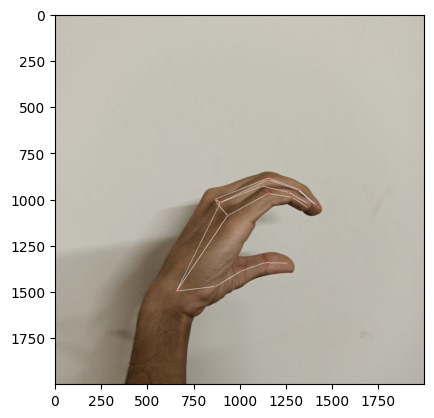

In [32]:
(wristX, wristY, wristZ,
thumb_CmcX, thumb_CmcY, thumb_CmcZ,
thumb_McpX, thumb_McpY, thumb_McpZ,
thumb_IpX, thumb_IpY, thumb_IpZ,
thumb_TipX, thumb_TipY, thumb_TipZ,
index_McpX, index_McpY, index_McpZ,
index_PipX, index_PipY, index_PipZ,
index_DipX, index_DipY, index_DipZ,
index_TipX, index_TipY, index_TipZ,
middle_McpX, middle_McpY, middle_McpZ,
middle_PipX, middle_PipY, middle_PipZ,
middle_DipX, middle_DipY, middle_DipZ,
middle_TipX, middle_TipY, middle_TipZ,
ring_McpX, ring_McpY, ring_McpZ,
ring_PipX, ring_PipY, ring_PipZ,
ring_DipX, ring_DipY, ring_DipZ,
ring_TipX, ring_TipY, ring_TipZ,
pinky_McpX, pinky_McpY, pinky_McpZ,
pinky_PipX, pinky_PipY, pinky_PipZ,
pinky_DipX, pinky_DipY, pinky_DipZ,
pinky_TipX, pinky_TipY, pinky_TipZ,
output_IMG) = extract_feature(input_path)


plt.axis("on")
plt.imshow(cv.cvtColor(output_IMG, cv.COLOR_BGR2RGB))
plt.show()

In [33]:
# cropframe = image
# frame = cv.resize(image, (1200, 1000))
# frame = cv.flip(frame, 1)
# cv.rectangle(image,(600,40),(1200,800),(0, 165, 255),1)
# cv.imshow("input frame", image)
# cropframe=frame[40:600,600:1200]
# cropframe = cv.resize(image,(2000,2000))
# cv.imwrite(input_path, cropframe)
# cv.imshow("output frame", cropframe)
input_IMG = pre(input_path)
print(model.predict(input_IMG))
predictions = np.argmax(model.predict(input_IMG), axis=1)

matching_keys = [key for key, value in classes.items() if value == predictions]

print(matching_keys[0])

1/1 [==============================] - 0s 19ms/step


E0000 00:00:1707789624.339474      34 gl_context.cc:408] INTERNAL: ; RET_CHECK failure (mediapipe/gpu/gl_context_egl.cc:303) successeglMakeCurrent() returned error 0x3008;  (entering GL context)
E0000 00:00:1707789624.339516      34 gl_context.cc:408] INTERNAL: ; RET_CHECK failure (mediapipe/gpu/gl_context_egl.cc:303) successeglMakeCurrent() returned error 0x3008;  (entering GL context)
E0000 00:00:1707789624.339531      34 gl_context.cc:408] INTERNAL: ; RET_CHECK failure (mediapipe/gpu/gl_context_egl.cc:303) successeglMakeCurrent() returned error 0x3008;  (entering GL context)


[[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.002 0.001 0.    0.    0.    0.    0.    0.896
  0.    0.1  ]]
1/1 [==============================] - 0s 20ms/step
X


In [34]:
input_IMG = pre(input_path)

# Get the raw predictions from the model
raw_predictions = model.predict(input_IMG)

# Get the index of the class with the highest probability for each prediction
predicted_classes = np.argmax(raw_predictions, axis=1)

# Get the corresponding probabilities for the predicted classes
predicted_probabilities = np.max(raw_predictions, axis=1)

# Set a threshold (40% in this case)
threshold = 0.3

# Create a list to store matching keys
matching_keys = []

# Iterate through predictions and check if probability is below the threshold
for class_idx, probability in zip(predicted_classes, predicted_probabilities):
    if probability >= threshold:
        matching_keys.append([key for key, value in classes.items() if value == class_idx][0])
    else:
        matching_keys.append("Bring your hand closer to camera and Keep it under the BOX")

# Print or use the matching keys as needed
print(matching_keys)


1/1 [==============================] - 0s 19ms/step
['X']


E0000 00:00:1707789626.424323      34 gl_context.cc:408] INTERNAL: ; RET_CHECK failure (mediapipe/gpu/gl_context_egl.cc:303) successeglMakeCurrent() returned error 0x3008;  (entering GL context)
E0000 00:00:1707789626.424387      34 gl_context.cc:408] INTERNAL: ; RET_CHECK failure (mediapipe/gpu/gl_context_egl.cc:303) successeglMakeCurrent() returned error 0x3008;  (entering GL context)
E0000 00:00:1707789626.424414      34 gl_context.cc:408] INTERNAL: ; RET_CHECK failure (mediapipe/gpu/gl_context_egl.cc:303) successeglMakeCurrent() returned error 0x3008;  (entering GL context)


In [35]:
# import os
# import numpy as np
# from flask import Flask,request,jsonify,render_template

In [36]:
# app = Flask(_name_)

# @app.route('/')
# def home():
    
#     time.sleep(1)  # simulate delay

#     in_path = "first1.jpeg"
#     # in_path = "first1.jpeg"
#     input_path = 'second1.jpg'
#     image = cv.imread(in_path)
#     image= cv.resize(image, (1200, 1000))
#     cv.rectangle(image,(600,200),(1200,900),(0, 165, 255),1)
#     cropframe=image[200:600,900:1200]
#     cropframe = cv.flip(cropframe, 1)
#     cv.imwrite(input_path,cropframe)
#     printt(input_path)
#     input_IMG = pre(input_path)
#     print(model.predict(input_IMG))
#     predictions = np.argmax(model.predict(input_IMG), axis=1)

#     matching_keys = [key for key, value in classes.items() if value == predictions]
#     response = jsonify(message=matching_keys[0])
#     print(matching_keys[0])

#     try:
#         os.remove(in_path)
#         print(f"File {in_path} has been deleted.")
#     except OSError as e:
#         print(f"Error: {e.strerror}")

#     return response

# if _name_ == '_main_':
#     app.run(port=4000)